<a href="https://colab.research.google.com/github/Farzana34/iFeature/blob/master/Depressive_text_without_emoji.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import logging
import pandas as pd
import numpy as np
from numpy import random
import gensim
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re
from bs4 import BeautifulSoup
                                 # library for regular expression operations
import string                              # for string operations

from nltk.corpus import stopwords          # module for stop words that come with NLTK
from nltk.stem import PorterStemmer        # module for stemming
from nltk.tokenize import TweetTokenizer 



import seaborn as sns
sns.set_style("whitegrid")



# Code for hiding seaborn warnings
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
# Text Classifiation using NLP

In [ ]:
#Importing the libraries
import numpy as np
import re
import pickle 
import nltk
from nltk.corpus import stopwords
from sklearn.datasets import load_files
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving dp_12.csv to dp_12.csv


In [ ]:
import io
import pandas as pd


reviews = pd.read_csv(io.BytesIO(uploaded['dp_12.csv']),encoding="UTF-8",header=None)
reviews.head()

,0,1
0,পরিবার কি জিনিস প্রত্যেকটা মুহূর্ত বুঝতেসি.......,depressed
1,"দেয়ালের ওপারে আছে আকাশ,খেয়ালের নানা রং আছে বাত...",depressed
2,এই আওয়াজটা আর মনে হয় না কোনোদিনও শুনতে পাবো 😔,depressed
3,"কনফিউশন হতেই পারে জীবনে অনেক সিচুয়েশন নিয়ে, কি...",not depressed
4,উনাদেরকে নিয়ে লিখা দরকার ভাবছি অনেকদিন থেকে।কি...,not depressed


In [ ]:
# Importing the dataset
#reviews = pd.read_csv('/content/drive/My Drive/dp.csv',encoding="UTF-8",header=None)
yy= reviews[1]
X=reviews[0]

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state = 42,shuffle=True)


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving stopwords.txt to stopwords.txt


In [ ]:
pip install py-bangla-stemmer

  Created wheel for py-bangla-stemmer: filename=py_bangla_stemmer-0.5.1-cp36-none-any.whl size=17336 sha256=9bff2fcbf962eef9d6b774ae96e60f9e3e698a08650152104b25e372ed3230e7
  Stored in directory: /root/.cache/pip/wheels/20/8e/75/395e25df10dbcfbff50808fffb5ea1ca576ab1c5b13251e2a8
Successfully built py-bangla-stemmer


In [ ]:
pip install git+https://github.com/banglakit/bengali-stemmer.git

  Cloning https://github.com/banglakit/bengali-stemmer.git to /tmp/pip-req-build-b29cgcg5
  Running command git clone -q https://github.com/banglakit/bengali-stemmer.git /tmp/pip-req-build-b29cgcg5
  Created wheel for bengali-stemmer: filename=bengali_stemmer-0.0.1-py2.py3-none-any.whl size=6393 sha256=cf5c30f2e9773ac3441945529ab4366443456bbb2190945737c19349e4caf7e3
  Stored in directory: /tmp/pip-ephem-wheel-cache-nljc1n36/wheels/a1/ad/a1/4ba354059b17c00600a14e13a504e7bdb49f20f2f4e2f3639c
Successfully built bengali-stemmer


In [ ]:
nltk.download('punkt')
from py_bangla_stemmer import BanglaStemmer

#stemmer = BanglaStemmer() 
from bengali_stemmer.rafikamal2014 import RafiStemmer
stemmer = RafiStemmer()
#stemmer.stem_word('বাংলায়')
#stemmer.stem('জনপ্রিয়তা')
with open('stopwords.txt', 'r', encoding='utf-8') as bn:
        bangla_stop_words = [line.strip() for line in bn]

from nltk.tokenize import word_tokenize 
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;!“ ”?#+-_*"%]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')

def clean_text(text):
   # """
    #    text: a string
        
    #    return: modified initial string
    #"""
    text = BeautifulSoup(text, "lxml").text # HTML decoding
    text = text.lower() # lowercase text
  
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    #text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    text= re.sub("\d+\.?\d*"," ", text)     #remove decimal number
    text = re.sub('[a-zA-Z]', ' ', text)     #remove english word\n",
    text = re.sub('[।]', ' ', text) #remove \n",
    text = re.sub('[.]', ' ', text) #remove .",
    text = text.replace("'", "") #remove '
    #text = re.sub('[\'\]', ' ', text)
    text=' '.join([stemmer.stem_word(word) for word in text.split() if word not in bangla_stop_words]) 
    #text = ' '.join([word for word in text.split() if word not in bangla_stop_words])  # remove stop words\n",
    #print(text)
    return text
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)
XX=[]
for news in X:
   news=clean_text(news)
   news=remove_emoji(news)
   print(news)
   XX.append(news)


Streaming output truncated to the last 5000 lines.
অনুরোধ রইল এগি সাহায্য করুন
শিক্ষক বাব সমতুল্য
জীবন টাইমলাইন দিনক্ষণ খুব অর্থবহ তাৎপর্যপূর্ণ
চেস্ দেখুন
ভালোবাস মানুষ
একটু ব্যস্ত আ আজ ইনবক্স মেসেজ একটু ধৈর্য্য ধরব প্লিজ
আজ আব্বু বেচ থাকল বল চিন্তা করো কেনো আল্লাহ ভরসা বাবা আছিনা
বাগান
বর্তমান এফ কমার্স জনপ্রি বিজনেস সাইট
ফেসবুক মেসেন্জ সকল নেট দুনিয়া স্টিক এসব স্টিকার অর্থ বুঝ কর ইচ্ছেমত
আল্লাহপাক সঠিক বুঝ দান করুক
আশাকরি শীগ্র আপনা ন্যায্য অধিক হিসেব শিক্ষার্থী বান্ধব ওয়েভার নোটিশ পাবো ইনশা আল্লাহ
বাংলাদেশ চলত শিক্ষা ব্যবসা
ঈ দুনিয়া বিদা
ষোল আনা বাঙ্গালীয়ানা
মা ক্যান্স আক্রান্ত
রিমঝিম বৃষ্ ঝর অঝোর ধারা
অপেক্ষা করিয়ে
জীবন চরম সত‍্য কথা
সরকারি বেসরকারি বিশ্ববিদ্যালয় পার্থক্য
চুয়েট শিক্ষার্থী তৈরি কোরবানির পশুর মড বাজ নকশা আজক দৈনিক আজাদীর প্রতিবেদন
আল্লাহ সুবহানাহু ওয়াতাআল অশেষ রহমত বাব কৃতিত্ব
স্কুল লাইফ মান
কথা সত্যি
ভালবাস রং কেমন ধূসর
সাবরিনা বিচ অথোরি বিচ
সবসম ইচ্ছা ছোট বেলা
দেশ সকল শিক্ষা ব্যবস্থা ব্যবসা রুপধারন
মৃত্যুর আগ স্বচক্ষ অবজারভেশন
এক একদম মন বানানোর এত্ খুশি লাগ বল
প্র

In [ ]:
print(XX)

['পরিব জিন প্রত্যেক মুহূর্ত বুঝতেসি একা এক বাসা অফ আসা রান্না কাপড় ধোয়া ', 'দেয়াল ওপার আকাশ খেয়াল রং বাতাস আকাশ বাতাস ছোঁ কেদ যা কেদ যা কেদ যা কেমন বল খান যা তোম আছ সবা ', 'আওয়াজ কোনোদিন শুন পাবো ', 'কনফিউশন জীবন সিচুয়েশন হ্যাট্রিক বিস্কিট ক্রিমি অরেঞ্জ মিল্ক কম্বিনেশন স্বাদ একদম কনফিউশন', 'উনা লিখা দরক ভাব অনেকদিন আজব লিখা আসছেনা', 'বল তো এখনো বি কর নি', 'পরিমাণ ফাকড আপ ওয়েদ হইল রাত ট সম ডিগ্রি সেলসিয়াস তাপমাত্ ', 'অসময় এক ঘুম হুট ঘুম ভেঙ কেমন এক উথাল পাথাল মন খারাপ ', 'বুক ভেতর\u200d কেমন খা খা সত্যিকার পৃথিবী চল পৃথিবী কেমন স্তব্ধ ', 'পৃথিবী সবচা কঠিন বোধহ বুঝানো অকারণ ভয়াবহ রকম মন খারাপ ', 'দেখো কেমন এক ভয়ংকর যুদ্ধ চল এখান দেখো যুদ্ধ আওয়াজ শুন পা কখনো শুন পা ', 'প্রতিব পাবলিক প্রাইভেট ভার্সি মারামারি লাগল সবচা দোটানা পড়ি ', 'রাত গা অদৃশ্য কা স্রষ্ লিখ বিষণ্ণতা ভ এক রাত ', 'হুট পৃথিবী কেমন শূন্য শূন্য লাগ কেমন এক হাহাক চারপাশ বাতাস কেমন এক বিষণ্ণতা ভেস বেড়া ', 'অকারণ বুক চেপ বসা কোথা অনুভূতিট ব্যাখ্যাতীত অসহা অনুভূতি পৃথিবী', 'একদিন বলসিলো ক্রাশ সাথ কথা বল এক উপা স্টোরি ভালো লিখ রিপ

In [ ]:
yy=pd.get_dummies(yy)
print(yy)

      depressed  not depressed
0             1              0
1             1              0
2             1              0
3             0              1
4             0              1
...         ...            ...
6173          1              0
6174          1              0
6175          0              1
6176          1              0
6177          0              1

[6178 rows x 2 columns]


In [ ]:
#print(yy.index[' not depressed'])
y=yy.iloc[:,1].values
print(y)

[0 0 0 ... 1 0 1]


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2500)
X = cv.fit_transform(XX).toarray()

In [ ]:
print(X)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state = 0,shuffle=True)

In [ ]:
print(X_train)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
from sklearn.naive_bayes import MultinomialNB

nb1= MultinomialNB().fit(X_train, y_train)

y_pred=nb1.predict(X_test)
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score,cross_val_predict
print("Accuracy: ")
print(accuracy_score(y_pred, y_test)*100)
nb_ac=accuracy_score(y_pred, y_test)*100
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("10 fold cross validation")
nb2 = cross_val_score(nb1, X, y, cv=10)
print(nb2.mean()*100)
predictions = cross_val_predict(nb1, X, y, cv=10)
print(classification_report(y,predictions))


Accuracy: 
69.01294498381877
[[427 210]
 [173 426]]
              precision    recall  f1-score   support

           0       0.71      0.67      0.69       637
           1       0.67      0.71      0.69       599

    accuracy                           0.69      1236
   macro avg       0.69      0.69      0.69      1236
weighted avg       0.69      0.69      0.69      1236

10 fold cross validation
68.90502640923563
              precision    recall  f1-score   support

           0       0.69      0.69      0.69      3078
           1       0.69      0.68      0.69      3100

    accuracy                           0.69      6178
   macro avg       0.69      0.69      0.69      6178
weighted avg       0.69      0.69      0.69      6178



In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import matthews_corrcoef
linear_clf = PassiveAggressiveClassifier(random_state=0)
linear_clf.fit(X_train, y_train)
pred = linear_clf.predict(X_test)
score = accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
print("10 fold cross validation")
linear_clf2 = cross_val_score(linear_clf, X, y, cv=10)
print(linear_clf2.mean()*100)
predictions = cross_val_predict(linear_clf, X, y, cv=10)
print(classification_report(y,predictions))

accuracy:   0.820
[[529 108]
 [114 485]]
              precision    recall  f1-score   support

           0       0.82      0.83      0.83       637
           1       0.82      0.81      0.81       599

    accuracy                           0.82      1236
   macro avg       0.82      0.82      0.82      1236
weighted avg       0.82      0.82      0.82      1236

10 fold cross validation
86.44999029650727
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      3078
           1       0.91      0.81      0.86      3100

    accuracy                           0.86      6178
   macro avg       0.87      0.86      0.86      6178
weighted avg       0.87      0.86      0.86      6178



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_v=TfidfVectorizer(max_features=5000,ngram_range=(1,3))
X=tfidf_v.fit_transform(XX).toarray()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import matthews_corrcoef
nb1= MultinomialNB(alpha=0.0).fit(X_train, y_train)

y_pred=nb1.predict(X_test)
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
print("Accuracy: ")
print(accuracy_score(y_pred, y_test)*100)
nb_ac=accuracy_score(y_pred, y_test)*100
print(nb1.score(X_test, y_test))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("10 fold cross validation")
nb2 = cross_val_score(nb1, X, y, cv=10)
print(nb2.mean()*100)
predictions = cross_val_predict(nb1, X, y, cv=10)
print(classification_report(y,predictions))
print('MCC=')
print(matthews_corrcoef(y, predictions))


Accuracy: 
78.72168284789643
0.7872168284789643
[[492 145]
 [118 481]]
              precision    recall  f1-score   support

           0       0.81      0.77      0.79       637
           1       0.77      0.80      0.79       599

    accuracy                           0.79      1236
   macro avg       0.79      0.79      0.79      1236
weighted avg       0.79      0.79      0.79      1236

10 fold cross validation
81.01136619932547
              precision    recall  f1-score   support

           0       0.81      0.80      0.81      3078
           1       0.81      0.82      0.81      3100

    accuracy                           0.81      6178
   macro avg       0.81      0.81      0.81      6178
weighted avg       0.81      0.81      0.81      6178

MCC=
0.6202851418782265


In [ ]:
tfidf_v.get_feature_names()[:20]

['অক',
 'অক তক',
 'অক রণ',
 'অগ',
 'অচ',
 'অজ',
 'অট',
 'অট লক',
 'অত',
 'অত কষ',
 'অত পর',
 'অত যন',
 'অত রত',
 'অদ',
 'অদ এক',
 'অদ এক অভ',
 'অদ কখন',
 'অদ কখন উদ',
 'অদ পর',
 'অদ পর ণত']

In [ ]:
tfidf_v.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [ ]:
count_df = pd.DataFrame(X_train, columns=tfidf_v.get_feature_names())

In [ ]:

count_df.head()

,অক,অক তক,অক রণ,অগ,অচ,অজ,অট,অট লক,অত,অত কষ,অত পর,অত যন,অত রত,অদ,অদ এক,অদ এক অভ,অদ কখন,অদ কখন উদ,অদ পর,অদ পর ণত,অদ বধ,অদ বধ ৎসক,অদ রষ,অদ রষ ষণ,অদ শল,অদ ষমত,অদ সম,অধ,অধ অনল,অধ অনল ইন,অধ ইব,অধ ইব ষমত,অধ কখন,অধ কখন অধ,অধ চল,অধ চল অত,অধ জনস,অধ জনস ধরণ,অধ ধব,অধ ধব ওয়,...,হত,হতভ,হন,হপ,হব,হম,হয,হর,হর অশ,হর অশ রহম,হর আল,হর ওয়,হর কর,হর ভরস,হর রহম,হর সম,হল,হস,হয়,হয় এক,হয়ত,হয়ন,ৎক,ৎস,ৎস রত,ৎসক,ড়ম,য়ক,য়গ,য়জন,য়ত,য়ন,য়ন মন,য়ব,য়ভ,য়ভ মন,য়ম,য়র,য়র রক,য়র রক শল
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier(random_state=0)
linear_clf.fit(X_train, y_train)
pred = linear_clf.predict(X_test)
score = accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
print(linear_clf.score(X_test, y_test))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
print("10 fold cross validation")
linear_clf2 = cross_val_score(linear_clf, X, y, cv=10)
print(linear_clf2.mean()*100)
predictions = cross_val_predict(linear_clf, X, y, cv=10)
print(classification_report(y,predictions))
print('MCC=')
print(matthews_corrcoef(y, predictions))

accuracy:   0.820
0.8203883495145631
[[529 108]
 [114 485]]
              precision    recall  f1-score   support

           0       0.82      0.83      0.83       637
           1       0.82      0.81      0.81       599

    accuracy                           0.82      1236
   macro avg       0.82      0.82      0.82      1236
weighted avg       0.82      0.82      0.82      1236

10 fold cross validation
86.44999029650727
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      3078
           1       0.91      0.81      0.86      3100

    accuracy                           0.86      6178
   macro avg       0.87      0.86      0.86      6178
weighted avg       0.87      0.86      0.86      6178

MCC=
0.733001288667574


In [ ]:
classifier=MultinomialNB(alpha=0.1)

In [ ]:

previous_score=0
for alpha in np.arange(0,1,0.1):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train,y_train)
    y_pred=sub_classifier.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    if score>previous_score:
        classifier=sub_classifier
    print("Alpha: {}, Score : {}".format(alpha,score))
    nb2 = cross_val_score(sub_classifier, X, y, cv=10)
    print(nb2.mean()*100)

Alpha: 0.0, Score : 0.7872168284789643
81.01136619932547
Alpha: 0.1, Score : 0.7783171521035599
80.57449922109802
Alpha: 0.2, Score : 0.7742718446601942
80.12118875653675
Alpha: 0.30000000000000004, Score : 0.7702265372168284
79.55474081184141
Alpha: 0.4, Score : 0.7653721682847896
79.08543269709891
Alpha: 0.5, Score : 0.7605177993527508
78.66461582036474
Alpha: 0.6000000000000001, Score : 0.7588996763754046
78.51895852674755
Alpha: 0.7000000000000001, Score : 0.7556634304207119
78.24385139494264
Alpha: 0.8, Score : 0.7548543689320388
77.92009567119321
Alpha: 0.9, Score : 0.7564724919093851
77.74207591802909


In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf_tree = DecisionTreeClassifier(random_state=0)

clf_tree.fit(X_train, y_train)
y_pred = clf_tree.predict(X_test) 
acc = accuracy_score(y_test, y_pred)

print (" Decission tree accuracy: ",acc*100)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("10 fold cross validation")
scores = cross_val_score(clf_tree, X, y, cv=10)
print(scores.mean()*100)
predictions = cross_val_predict(clf_tree, X, y, cv=10)
print(classification_report(y,predictions))
print('MCC=')
print(matthews_corrcoef(y, predictions))

 Decission tree accuracy:  85.03236245954693
[[561  76]
 [109 490]]
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       637
           1       0.87      0.82      0.84       599

    accuracy                           0.85      1236
   macro avg       0.85      0.85      0.85      1236
weighted avg       0.85      0.85      0.85      1236

10 fold cross validation
90.59398488353185
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      3078
           1       0.96      0.85      0.90      3100

    accuracy                           0.91      6178
   macro avg       0.91      0.91      0.91      6178
weighted avg       0.91      0.91      0.91      6178

MCC=
0.8167973483556393


In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(max_depth=200, random_state=0)
clf_rf.fit(X_train, y_train)
y_pred = clf_rf.predict(X_test) 
acc = accuracy_score(y_test, y_pred)

print ("random Forest accuracy: ",acc*100)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("10 fold cross validation")
scores = cross_val_score(clf_rf, X, y, cv=10)
print(scores.mean()*100)
predictions = cross_val_predict(clf_rf, X, y, cv=10)
print(classification_report(y,predictions))
print('MCC=')
print(matthews_corrcoef(y, predictions))

random Forest accuracy:  84.46601941747572
[[580  57]
 [135 464]]
              precision    recall  f1-score   support

           0       0.81      0.91      0.86       637
           1       0.89      0.77      0.83       599

    accuracy                           0.84      1236
   macro avg       0.85      0.84      0.84      1236
weighted avg       0.85      0.84      0.84      1236

10 fold cross validation
88.66820873524152
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      3078
           1       0.96      0.81      0.88      3100

    accuracy                           0.89      6178
   macro avg       0.90      0.89      0.89      6178
weighted avg       0.90      0.89      0.89      6178

MCC=
0.7831756339994782


In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(13,13,13),max_iter=500)
mlp.fit(X_train,y_train)
predictions = mlp.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test,predictions))
print("10 fold cross validation")
scores = cross_val_score(mlp, X, y, cv=10)
print(scores.mean()*100)
predictions = cross_val_predict(mlp, X, y, cv=10)
print(classification_report(y,predictions))
print('MCC=')
print(matthews_corrcoef(y, predictions))

[[572  65]
 [111 488]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       637
           1       0.88      0.81      0.85       599

    accuracy                           0.86      1236
   macro avg       0.86      0.86      0.86      1236
weighted avg       0.86      0.86      0.86      1236

0.8576051779935275
10 fold cross validation
89.44482908739963
              precision    recall  f1-score   support

           0       0.87      0.92      0.89      3078
           1       0.92      0.86      0.89      3100

    accuracy                           0.89      6178
   macro avg       0.89      0.89      0.89      6178
weighted avg       0.89      0.89      0.89      6178

MCC=
0.7841367900174799


In [ ]:
from sklearn.linear_model import LogisticRegression
classifer = LogisticRegression(random_state=0)
classifer.fit(X_train,y_train)
yy_pred= classifer.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))
print("10 fold cross validation")
scores = cross_val_score(classifer, X, y, cv=10)
print(scores.mean()*100)
predictions = cross_val_predict(classifer, X, y, cv=10)
print(classification_report(y,predictions))
print('MCC=')
print(matthews_corrcoef(y, predictions))

[[580  57]
 [135 464]]
              precision    recall  f1-score   support

           0       0.81      0.91      0.86       637
           1       0.89      0.77      0.83       599

    accuracy                           0.84      1236
   macro avg       0.85      0.84      0.84      1236
weighted avg       0.85      0.84      0.84      1236

0.8446601941747572
10 fold cross validation
75.93019779389782
              precision    recall  f1-score   support

           0       0.74      0.80      0.77      3078
           1       0.79      0.71      0.75      3100

    accuracy                           0.76      6178
   macro avg       0.76      0.76      0.76      6178
weighted avg       0.76      0.76      0.76      6178

MCC=
0.5209548536412977


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(XX, y, test_size=0.2,random_state = 0,shuffle=True)

In [ ]:
#decission tree
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.datasets import fetch_20newsgroups
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', tree.DecisionTreeClassifier()),
                     ])

text_clf.fit(X_train, y_train)
predicted = text_clf.predict(X_test)
print(metrics.classification_report(y_test, predicted))

print("10 fold cross validation")
scores = cross_val_score(text_clf, XX, y, cv=10)
print(scores.mean()*100)
predictions = cross_val_predict(text_clf, XX, y, cv=10)
print(classification_report(y,predictions))
print('MCC=')
print(matthews_corrcoef(y, predictions))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86       637
           1       0.87      0.81      0.84       599

    accuracy                           0.85      1236
   macro avg       0.85      0.85      0.85      1236
weighted avg       0.85      0.85      0.85      1236

10 fold cross validation
90.73956350018098
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      3078
           1       0.96      0.85      0.90      3100

    accuracy                           0.91      6178
   macro avg       0.91      0.91      0.91      6178
weighted avg       0.91      0.91      0.91      6178

MCC=
0.8182798125573525


In [ ]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.datasets import fetch_20newsgroups
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', KNeighborsClassifier()),
                     ])

text_clf.fit(X_train, y_train)


predicted = text_clf.predict(X_test)

print(metrics.classification_report(y_test, predicted))
print("10 fold cross validation")
scores = cross_val_score(text_clf, XX, y, cv=10)
print(scores.mean()*100)
predictions = cross_val_predict(text_clf, XX, y, cv=10)
print(classification_report(y,predictions))
print('MCC=')
print(matthews_corrcoef(y, predictions))

              precision    recall  f1-score   support

           0       0.67      0.66      0.67       637
           1       0.65      0.65      0.65       599

    accuracy                           0.66      1236
   macro avg       0.66      0.66      0.66      1236
weighted avg       0.66      0.66      0.66      1236

10 fold cross validation
68.83967207439693
              precision    recall  f1-score   support

           0       0.67      0.73      0.70      3078
           1       0.71      0.65      0.68      3100

    accuracy                           0.69      6178
   macro avg       0.69      0.69      0.69      6178
weighted avg       0.69      0.69      0.69      6178

MCC=
0.3780972003546343


In [ ]:
#MultinomialNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.datasets import fetch_20newsgroups
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', MultinomialNB(alpha=0.1)),
                     ])

text_clf.fit(X_train, y_train)


predicted = text_clf.predict(X_test)

print(metrics.classification_report(y_test, predicted))

print("10 fold cross validation")
scores = cross_val_score(text_clf, XX, y, cv=10)
print(scores.mean()*100)
predictions = cross_val_predict(text_clf, XX, y, cv=10)
print(classification_report(y,predictions))
print('MCC=')
print(matthews_corrcoef(y, predictions))

              precision    recall  f1-score   support

           0       0.73      0.67      0.70       637
           1       0.68      0.74      0.71       599

    accuracy                           0.70      1236
   macro avg       0.70      0.70      0.70      1236
weighted avg       0.71      0.70      0.70      1236

10 fold cross validation
71.41424472733185
              precision    recall  f1-score   support

           0       0.72      0.70      0.71      3078
           1       0.71      0.72      0.72      3100

    accuracy                           0.71      6178
   macro avg       0.71      0.71      0.71      6178
weighted avg       0.71      0.71      0.71      6178

MCC=
0.42832398839719343


In [ ]:
#bagging
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.datasets import fetch_20newsgroups
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', BaggingClassifier(KNeighborsClassifier())),
                     ])

text_clf.fit(X_train, y_train)


predicted = text_clf.predict(X_test)

print(metrics.classification_report(y_test, predicted))
print("10 fold cross validation")
scores = cross_val_score(text_clf, XX, y, cv=10)
print(scores.mean()*100)
predictions = cross_val_predict(text_clf, XX, y, cv=10)
print(classification_report(y,predictions))
print('MCC=')
print(matthews_corrcoef(y, predictions))

              precision    recall  f1-score   support

           0       0.69      0.76      0.72       637
           1       0.72      0.63      0.67       599

    accuracy                           0.70      1236
   macro avg       0.70      0.70      0.70      1236
weighted avg       0.70      0.70      0.70      1236

10 fold cross validation
71.31676396385056
              precision    recall  f1-score   support

           0       0.69      0.79      0.74      3078
           1       0.76      0.64      0.70      3100

    accuracy                           0.72      6178
   macro avg       0.72      0.72      0.72      6178
weighted avg       0.72      0.72      0.72      6178

MCC=
0.44406958209100905


In [ ]:
#boosting
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.datasets import fetch_20newsgroups
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', GradientBoostingClassifier(n_estimators=4550,verbose=2)),
                     ])
text_clf.fit(X_train, y_train)
predicted = text_clf.predict(X_test)
print(classification_report(y_test, predicted))


      Iter       Train Loss   Remaining Time 
         1           1.3753           35.04s
         2           1.3663           33.83s
         3           1.3589           33.14s
         4           1.3523           33.74s
         5           1.3467           33.44s
         6           1.3413           32.95s
         7           1.3372           32.52s
         8           1.3337           32.22s
         9           1.3300           31.98s
        10           1.3270           31.71s
        11           1.3237           31.68s
        12           1.3208           31.58s
        13           1.3181           31.73s
        14           1.3150           31.71s
        15           1.3126           31.60s
        16           1.3099           31.55s
        17           1.3073           31.50s
        18           1.3046           31.43s
        19           1.3023           31.38s
        20           1.3004           31.38s
        21           1.2988           31.39s
        2

In [ ]:

scores = cross_val_score(text_clf, XX, y, cv=10)
print(scores.mean()*100)
predictions = cross_val_predict(text_clf, XX, y, cv=10)
print(classification_report(y,predictions))
print('MCC=')
print(matthews_corrcoef(y, predictions))

Streaming output truncated to the last 5000 lines.
      4114           0.4050            3.02s
      4115           0.4049            3.02s
      4116           0.4049            3.01s
      4117           0.4048            3.00s
      4118           0.4048            3.00s
      4119           0.4047            2.99s
      4120           0.4046            2.98s
      4121           0.4046            2.97s
      4122           0.4046            2.97s
      4123           0.4045            2.96s
      4124           0.4045            2.95s
      4125           0.4044            2.95s
      4126           0.4043            2.94s
      4127           0.4042            2.93s
      4128           0.4042            2.93s
      4129           0.4041            2.92s
      4130           0.4041            2.91s
      4131           0.4040            2.91s
      4132           0.4040            2.90s
      4133           0.4039            2.89s
      4134           0.4038            2.88s
    

In [ ]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.datasets import fetch_20newsgroups
num_trees = 300
max_features = 30
text_clf = Pipeline([('vect', CountVectorizer(ngram_range=(1,3))),
                     ('tfidf', TfidfTransformer()),
                     ('clf', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)),
                     ])

text_clf.fit(X_train, y_train)


predicted = text_clf.predict(X_test)

print(metrics.classification_report(y_test, predicted))

print("10 fold cross validation")
scores = cross_val_score(text_clf, XX, y, cv=10)
print(scores.mean()*100)
predictions = cross_val_predict(text_clf, XX, y, cv=10)
print(classification_report(y,predictions))
print('MCC=')
print(matthews_corrcoef(y, predictions))


              precision    recall  f1-score   support

           0       0.85      0.91      0.88       637
           1       0.90      0.83      0.87       599

    accuracy                           0.87      1236
   macro avg       0.88      0.87      0.87      1236
weighted avg       0.88      0.87      0.87      1236

10 fold cross validation
91.41988324337935
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      3078
           1       0.95      0.87      0.91      3100

    accuracy                           0.91      6178
   macro avg       0.92      0.91      0.91      6178
weighted avg       0.92      0.91      0.91      6178

MCC=
0.8293490292713619


In [ ]:
from sklearn.neighbors.nearest_centroid import NearestCentroid
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.datasets import fetch_20newsgroups
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', NearestCentroid()),
                     ])

text_clf.fit(X_train, y_train)
predicted = text_clf.predict(X_test)
print(metrics.classification_report(y_test, predicted))
print("10 fold cross validation")
scores = cross_val_score(text_clf, XX, y, cv=10)
print(scores.mean()*100)
predictions = cross_val_predict(text_clf, XX, y, cv=10)
print('MCC=')
print(matthews_corrcoef(y, predictions))
print('MCC=')
print(matthews_corrcoef(y, predictions))

              precision    recall  f1-score   support

           0       0.66      0.70      0.68       637
           1       0.66      0.62      0.64       599

    accuracy                           0.66      1236
   macro avg       0.66      0.66      0.66      1236
weighted avg       0.66      0.66      0.66      1236

10 fold cross validation
64.16258857715327
MCC=
0.28326203122655463
MCC=
0.28326203122655463


In [ ]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.datasets import fetch_20newsgroups
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', LinearSVC()),
                     ])

text_clf.fit(X_train, y_train)


predicted = text_clf.predict(X_test)

print(metrics.classification_report(y_test, predicted))
print("10 fold cross validation")
scores = cross_val_score(text_clf, XX, y, cv=10)
print(scores.mean()*100)
predictions = cross_val_predict(text_clf, XX, y, cv=10)
print(classification_report(y,predictions))
print('MCC=')
print(matthews_corrcoef(y, predictions))

              precision    recall  f1-score   support

           0       0.74      0.75      0.75       637
           1       0.73      0.72      0.72       599

    accuracy                           0.74      1236
   macro avg       0.74      0.73      0.74      1236
weighted avg       0.74      0.74      0.74      1236

10 fold cross validation
73.25977036815577
              precision    recall  f1-score   support

           0       0.71      0.77      0.74      3078
           1       0.76      0.69      0.72      3100

    accuracy                           0.73      6178
   macro avg       0.73      0.73      0.73      6178
weighted avg       0.73      0.73      0.73      6178

MCC=
0.467062914336514


In [ ]:
from sklearn.linear_model import SGDClassifier

sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=0, max_iter=50, tol=None)),
               ])
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)

print("Accuracy: ")
print(accuracy_score(y_pred, y_test)*100)
print(classification_report(y_test, y_pred))
print("10 fold cross validation")
scores = cross_val_score(sgd, XX, y, cv=10)
print(scores.mean()*100)
predictions = cross_val_predict(sgd, XX, y, cv=10)
print(classification_report(y,predictions))
print('MCC=')
print(matthews_corrcoef(y, predictions))


Accuracy: 
67.15210355987054
              precision    recall  f1-score   support

           0       0.68      0.69      0.68       637
           1       0.66      0.65      0.66       599

    accuracy                           0.67      1236
   macro avg       0.67      0.67      0.67      1236
weighted avg       0.67      0.67      0.67      1236

10 fold cross validation
67.44937137102485
              precision    recall  f1-score   support

           0       0.66      0.72      0.69      3078
           1       0.69      0.63      0.66      3100

    accuracy                           0.67      6178
   macro avg       0.68      0.67      0.67      6178
weighted avg       0.68      0.67      0.67      6178

MCC=
0.3507033319196144


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM,GRU, Conv2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dropout

In [ ]:
voc_size=20000

In [ ]:
onehot_repr=[one_hot(words,voc_size)for words in XX] 
onehot_repr

[[16327,
  16875,
  15305,
  18910,
  7544,
  6699,
  4589,
  4686,
  18745,
  2431,
  1544,
  6698,
  13740],
 [12994,
  8817,
  11490,
  798,
  13703,
  5978,
  11490,
  5978,
  13369,
  5839,
  19244,
  5839,
  19244,
  5839,
  19244,
  13154,
  8562,
  4413,
  19244,
  19687,
  13773,
  7661],
 [2204, 15465, 5314, 14141],
 [1293, 8113, 14113, 3245, 16321, 17181, 8602, 14460, 7832, 15858, 5073, 1293],
 [5755, 5446, 8570, 18101, 12573, 9489, 5446, 8575],
 [8562, 3697, 8670, 6745, 18030, 4513],
 [11068, 7222, 17093, 6508, 1318, 2545, 12049, 17021, 16232, 8355, 9556],
 [8948, 4589, 5149, 6721, 5149, 13910, 13154, 4589, 1082, 9893, 9115, 3621],
 [6740, 14815, 13154, 4971, 4971, 14829, 18908, 15113, 18908, 13154, 17885],
 [18908, 18526, 9761, 9192, 12732, 1113, 1285, 5208, 9115, 3621],
 [4903,
  13154,
  4589,
  331,
  3248,
  15113,
  3294,
  4903,
  3248,
  2204,
  5314,
  13140,
  15561,
  5314,
  13140],
 [5426, 5151, 15694, 19934, 5108, 19983, 18526, 16459, 19738],
 [2545, 1368, 126

In [ ]:
sent_length=40
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[    0     0     0 ...  1544  6698 13740]
 [    0     0     0 ... 19687 13773  7661]
 [    0     0     0 ... 15465  5314 14141]
 ...
 [    0     0     0 ...  6671   475 13772]
 [    0     0     0 ... 19739  2767  3621]
 [    0     0     0 ...  3020  4589  4281]]


In [ ]:
embedded_docs[0]

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
       16327, 16875, 15305, 18910,  7544,  6699,  4589,  4686, 18745,
        2431,  1544,  6698, 13740], dtype=int32)

In [ ]:
## Creating model
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(LSTM(100))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 40, 40)            800000    
_________________________________________________________________
lstm (LSTM)                  (None, 100)               56400     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 856,501
Trainable params: 856,501
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
embedding_vector_features=40
model1=Sequential()
model1.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model1.add(Bidirectional(LSTM(100)))
model1.add(Dropout(0.3))
model1.add(Dense(1,activation='sigmoid'))
model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model1.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 40, 40)            800000    
_________________________________________________________________
bidirectional (Bidirectional (None, 200)               112800    
_________________________________________________________________
dropout (Dropout)            (None, 200)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 201       
Total params: 913,001
Trainable params: 913,001
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
import numpy as np
X_final=np.array(embedded_docs)
y_final=np.array(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.2, random_state=0)

In [ ]:
#bidirectional lstm
history=model1.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=60,batch_size=50)

Epoch 1/60
99/99 [==============================] - 8s 78ms/step - loss: 0.0045 - accuracy: 0.9972 - val_loss: 0.5079 - val_accuracy: 0.9256
Epoch 2/60
99/99 [==============================] - 8s 80ms/step - loss: 0.0040 - accuracy: 0.9976 - val_loss: 0.5767 - val_accuracy: 0.9256
Epoch 3/60
99/99 [==============================] - 8s 79ms/step - loss: 0.0245 - accuracy: 0.9913 - val_loss: 0.3304 - val_accuracy: 0.9199
Epoch 4/60
99/99 [==============================] - 8s 79ms/step - loss: 0.0267 - accuracy: 0.9905 - val_loss: 0.3725 - val_accuracy: 0.9264
Epoch 5/60
99/99 [==============================] - 8s 78ms/step - loss: 0.0089 - accuracy: 0.9966 - val_loss: 0.4053 - val_accuracy: 0.9207
Epoch 6/60
99/99 [==============================] - 8s 79ms/step - loss: 0.0058 - accuracy: 0.9972 - val_loss: 0.4434 - val_accuracy: 0.9256
Epoch 7/60
99/99 [==============================] - 8s 78ms/step - loss: 0.0047 - accuracy: 0.9974 - val_loss: 0.4427 - val_accuracy: 0.9256
Epoch 8/60
99

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
0.9288025889967637
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       637
           1       0.92      0.93      0.93       599

    accuracy                           0.93      1236
   macro avg       0.93      0.93      0.93      1236
weighted avg       0.93      0.93      0.93      1236

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


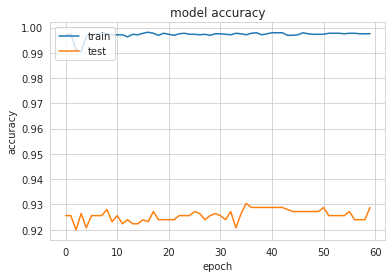

MCC=
0.8576537832287332


In [ ]:
#Bidrectional LSTM
from keras.callbacks import History 
import matplotlib.pyplot as plt
y_pred1=model1.predict_classes(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred1)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred1))
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred1))
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
print('MCC=')
print(matthews_corrcoef(y_test, y_pred1))

In [ ]:
#LSTM
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64)

Epoch 1/100
78/78 [==============================] - 5s 62ms/step - loss: 0.6718 - accuracy: 0.6081 - val_loss: 0.6103 - val_accuracy: 0.7241
Epoch 2/100
78/78 [==============================] - 5s 59ms/step - loss: 0.4454 - accuracy: 0.8191 - val_loss: 0.4163 - val_accuracy: 0.8188
Epoch 3/100
78/78 [==============================] - 4s 57ms/step - loss: 0.2379 - accuracy: 0.9136 - val_loss: 0.3234 - val_accuracy: 0.8608
Epoch 4/100
78/78 [==============================] - 4s 57ms/step - loss: 0.1957 - accuracy: 0.9221 - val_loss: 0.3267 - val_accuracy: 0.8649
Epoch 5/100
78/78 [==============================] - 4s 57ms/step - loss: 0.1410 - accuracy: 0.9456 - val_loss: 0.2803 - val_accuracy: 0.9094
Epoch 6/100
78/78 [==============================] - 4s 57ms/step - loss: 0.0817 - accuracy: 0.9761 - val_loss: 0.2872 - val_accuracy: 0.9102
Epoch 7/100
78/78 [==============================] - 4s 57ms/step - loss: 0.0569 - accuracy: 0.9818 - val_loss: 0.3040 - val_accuracy: 0.9118
Epoch 

In [ ]:
#LSTM
y_pred1=model.predict_classes(X_test)
print(confusion_matrix(y_test,y_pred1))
print(accuracy_score(y_test,y_pred1))
print(classification_report(y_test,y_pred1))
print('MCC=')
print(matthews_corrcoef(y_test, y_pred1))

[[582  55]
 [ 35 564]]
0.9271844660194175
              precision    recall  f1-score   support

           0       0.94      0.91      0.93       637
           1       0.91      0.94      0.93       599

    accuracy                           0.93      1236
   macro avg       0.93      0.93      0.93      1236
weighted avg       0.93      0.93      0.93      1236



In [ ]:
#GRU
embedding_vector_features=40
model3=Sequential()
model3.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model3.add(GRU(units=32,dropout=0.2,recurrent_dropout=0.2))
model3.add(Dense(1,activation='sigmoid'))
model3.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model3.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 40, 40)            400000    
_________________________________________________________________
gru_1 (GRU)                  (None, 32)                7104      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 33        
Total params: 407,137
Trainable params: 407,137
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model3.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64)

Epoch 1/100
78/78 [==============================] - 4s 50ms/step - loss: 0.6724 - accuracy: 0.6188 - val_loss: 0.5952 - val_accuracy: 0.7694
Epoch 2/100
78/78 [==============================] - 4s 47ms/step - loss: 0.4374 - accuracy: 0.8112 - val_loss: 0.4141 - val_accuracy: 0.8236
Epoch 3/100
78/78 [==============================] - 4s 48ms/step - loss: 0.2422 - accuracy: 0.9035 - val_loss: 0.3258 - val_accuracy: 0.8738
Epoch 4/100
78/78 [==============================] - 4s 49ms/step - loss: 0.1506 - accuracy: 0.9454 - val_loss: 0.2847 - val_accuracy: 0.9053
Epoch 5/100
78/78 [==============================] - 4s 47ms/step - loss: 0.1046 - accuracy: 0.9646 - val_loss: 0.2880 - val_accuracy: 0.9110
Epoch 6/100
78/78 [==============================] - 4s 48ms/step - loss: 0.0792 - accuracy: 0.9713 - val_loss: 0.2857 - val_accuracy: 0.9183
Epoch 7/100
78/78 [==============================] - 6s 71ms/step - loss: 0.0602 - accuracy: 0.9798 - val_loss: 0.2905 - val_accuracy: 0.9207
Epoch 

In [ ]:
y_pred1=model3.predict_classes(X_test)
print(confusion_matrix(y_test,y_pred1))
print(accuracy_score(y_test,y_pred1))
print(classification_report(y_test,y_pred1))
print('MCC=')
print(matthews_corrcoef(y_test, y_pred1))

[[578  59]
 [ 35 564]]
0.9239482200647249
              precision    recall  f1-score   support

           0       0.94      0.91      0.92       637
           1       0.91      0.94      0.92       599

    accuracy                           0.92      1236
   macro avg       0.92      0.92      0.92      1236
weighted avg       0.92      0.92      0.92      1236



In [ ]:
from keras.layers import  Conv1D, SpatialDropout1D, GlobalMaxPool1D
embedding_vector_features=40
drop_embed = 0.2
n_conv = 256
k_conv = 3
n_dense = 256
dropout = 0.2
model4=Sequential()
model4.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model4.add(SpatialDropout1D(drop_embed))
model4.add(Conv1D(n_conv, k_conv, activation='relu'))
model4.add(GlobalMaxPool1D())
model4.add(Dense(n_dense, activation='relu'))
model4.add(Dropout(dropout))
model4.add(Dense(1, activation='sigmoid'))
model4.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
print(model4.summary())

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 40, 40)            400000    
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 40, 40)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 38, 256)           30976     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 256)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                

In [ ]:
model4.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64)

Epoch 1/100
78/78 [==============================] - 2s 25ms/step - loss: 0.6761 - accuracy: 0.5811 - val_loss: 0.5770 - val_accuracy: 0.7395
Epoch 2/100
78/78 [==============================] - 2s 23ms/step - loss: 0.3951 - accuracy: 0.8323 - val_loss: 0.3667 - val_accuracy: 0.8528
Epoch 3/100
78/78 [==============================] - 2s 23ms/step - loss: 0.1551 - accuracy: 0.9474 - val_loss: 0.2686 - val_accuracy: 0.8972
Epoch 4/100
78/78 [==============================] - 2s 23ms/step - loss: 0.0689 - accuracy: 0.9767 - val_loss: 0.2722 - val_accuracy: 0.9175
Epoch 5/100
78/78 [==============================] - 2s 23ms/step - loss: 0.0384 - accuracy: 0.9891 - val_loss: 0.3087 - val_accuracy: 0.9207
Epoch 6/100
78/78 [==============================] - 2s 23ms/step - loss: 0.0245 - accuracy: 0.9929 - val_loss: 0.3100 - val_accuracy: 0.9272
Epoch 7/100
78/78 [==============================] - 2s 23ms/step - loss: 0.0196 - accuracy: 0.9947 - val_loss: 0.3321 - val_accuracy: 0.9272
Epoch 

In [ ]:
y_pred1=model4.predict_classes(X_test)
print(confusion_matrix(y_test,y_pred1))
print(accuracy_score(y_test,y_pred1))
print(classification_report(y_test,y_pred1))
print('MCC=')
print(matthews_corrcoef(y_test, y_pred1))

[[574  63]
 [ 28 571]]
0.9263754045307443
              precision    recall  f1-score   support

           0       0.95      0.90      0.93       637
           1       0.90      0.95      0.93       599

    accuracy                           0.93      1236
   macro avg       0.93      0.93      0.93      1236
weighted avg       0.93      0.93      0.93      1236

